Diffusion model Q can be thought of as the following: 
Simulate and visualize the spread of a disease using the SIR (Susceptible-Infected-Recovered) model. 
Given the following:
•	S(t): Number of susceptible individuals
•	I(t): Number of infected individuals
•	R(t): Number of recovered (or removed) individuals
Assume appropriate values for the model parameters and the initial conditions. For example::
•	β (beta): Infection rate (0.3)
•	γ (gamma): Recovery rate (0.1)
•	N: Total population (1000)
•	Initial conditions:
o	S(0) = N - I₀ - R₀
o	I(0) = 1
o	R(0) = 0
1.	Implement the SIR model using ordinary differential equations (ODEs).
2.	Use Python's scipy.integrate.odeint to solve the system over a period of 160 days.
3.	Generate a line plot with time on the x-axis and population on the y-axis showing:
o	Susceptible (blue)
o	Infected (red)
o	Recovered (green)
Label all axes, include a title ("SIR Model Simulation"), and provide a legend.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Total population, N
N = 1000
# Initial number of infected and recovered individuals, I0 and R0
I0 = 1
R0 = 0
# Everyone else, S0, is susceptible to infection initially
S0 = N - I0 - R0

In [3]:
# Contact rate (beta), and mean recovery rate (gamma)
beta = 0.3  # infection rate
gamma = 0.1  # recovery rate

In [4]:

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

In [5]:

# The SIR model differential equations
def sir_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


In [6]:
# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t
ret = odeint(sir_model, y0, t, args=(N, beta, gamma))
S, I, R = ret.T  # transpose to unpack into S, I, R


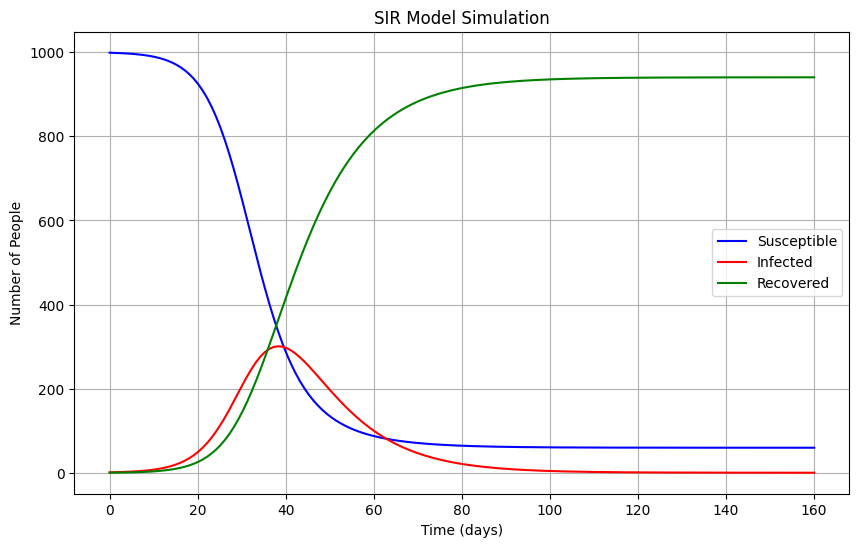

In [7]:

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered')
plt.title("SIR Model Simulation")
plt.xlabel("Time (days)")
plt.ylabel("Number of People")
plt.legend()
plt.grid(True)
plt.show()

## Another

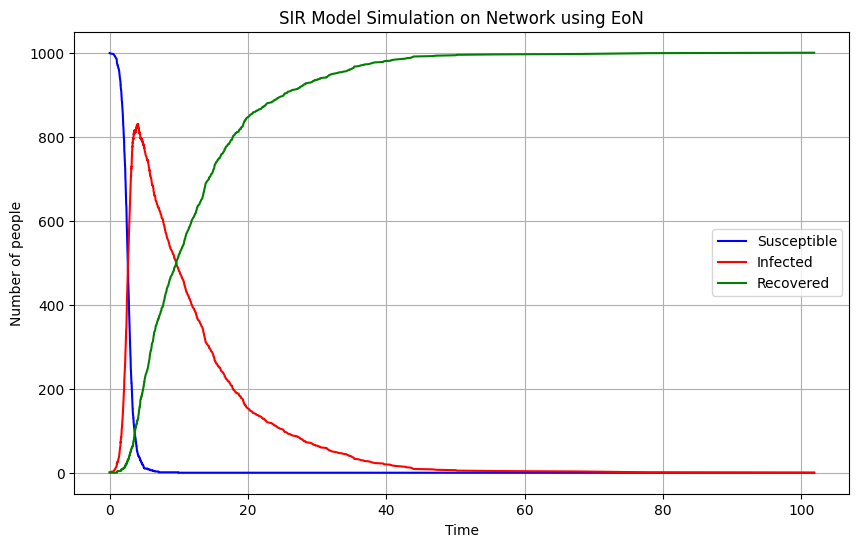

In [8]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt

# Create a network: 1000 nodes, Erdos-Renyi random graph
G = nx.erdos_renyi_graph(n=1000, p=0.01)

# Set the SIR parameters
beta = 0.3   # infection rate
gamma = 0.1  # recovery rate

# Choose one node to be initially infected
initial_infected = [0]

# Simulate the SIR model
t, S, I, R = EoN.fast_SIR(G, tau=beta, gamma=gamma, initial_infecteds=initial_infected)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Susceptible', color='blue')
plt.plot(t, I, label='Infected', color='red')
plt.plot(t, R, label='Recovered', color='green')
plt.xlabel("Time")
plt.ylabel("Number of people")
plt.title("SIR Model Simulation on Network using EoN")
plt.legend()
plt.grid(True)
plt.show()
